In [1]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LinearRegression
import numpy as np
import os
from pathlib import Path
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline




Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Electricity Generation

In [2]:
#Load and Read data
gen_path = Path("../Data/electricity_generation_all.csv")
generation_data = pd.read_csv(gen_path)
generation_data.head()

MSN  YYYYMM       Value  Column_Order  \
0  CLETPUS  194913   135451.32             1   
1  CLETPUS  195013  154519.994             1   
2  CLETPUS  195113  185203.657             1   
3  CLETPUS  195213  195436.666             1   
4  CLETPUS  195313  218846.325             1   

                                         Description                   Unit  
0  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
1  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
2  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
3  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
4  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours

In [3]:
generation_data['YYYYMM'] = pd.to_datetime(generation_data['YYYYMM'], format='%Y%m', errors='coerce')
generation_data.dropna(inplace=True)

In [4]:
generation_data.head()

MSN     YYYYMM      Value  Column_Order  \
24  CLETPUS 1973-01-01  75190.149             1   
25  CLETPUS 1973-02-01  67797.946             1   
26  CLETPUS 1973-03-01  67387.612             1   
27  CLETPUS 1973-04-01  63935.049             1   
28  CLETPUS 1973-05-01  64927.181             1   

                                          Description                   Unit  
24  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
25  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
26  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
27  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours  
28  Electricity Net Generation From Coal, All Sectors  Million Kilowatthours

In [5]:
generation_data.drop(['Description','Column_Order'], axis=1, inplace=True)

In [6]:
generation_data.head()

MSN     YYYYMM      Value                   Unit
24  CLETPUS 1973-01-01  75190.149  Million Kilowatthours
25  CLETPUS 1973-02-01  67797.946  Million Kilowatthours
26  CLETPUS 1973-03-01  67387.612  Million Kilowatthours
27  CLETPUS 1973-04-01  63935.049  Million Kilowatthours
28  CLETPUS 1973-05-01  64927.181  Million Kilowatthours

In [7]:
generation_data.rename(columns= {'MSN':'Source','YYYYMM':'Date'}, inplace=True)
generation_data = generation_data.set_index('Date')

In [8]:
generation_data.head()


Source      Value                   Unit
Date                                                 
1973-01-01  CLETPUS  75190.149  Million Kilowatthours
1973-02-01  CLETPUS  67797.946  Million Kilowatthours
1973-03-01  CLETPUS  67387.612  Million Kilowatthours
1973-04-01  CLETPUS  63935.049  Million Kilowatthours
1973-05-01  CLETPUS  64927.181  Million Kilowatthours

In [9]:
coal = generation_data[generation_data.Source == 'CLETPUS']
coal.rename(columns= {'Value':'Coal'}, inplace=True)
coal.drop(['Source','Unit'], axis=1, inplace=True)

In [10]:
coal.head()

Coal
Date                 
1973-01-01  75190.149
1973-02-01  67797.946
1973-03-01  67387.612
1973-04-01  63935.049
1973-05-01  64927.181

In [11]:
petroleum = generation_data[generation_data.Source == 'PAETPUS']
petroleum.rename(columns= {'Value':'Petroleum'}, inplace=True)
petroleum.drop(['Source','Unit'], axis=1, inplace=True)

In [12]:
petroleum.head()

Petroleum
Date                 
1973-01-01  31183.619
1973-02-01  26086.952
1973-03-01  24033.245
1973-04-01  20195.424
1973-05-01  21741.975

In [13]:
natgas = generation_data[generation_data.Source == 'NGETPUS']
natgas.rename(columns= {'Value':'Natural_Gas'}, inplace=True)
natgas.drop(['Source','Unit'], axis=1, inplace=True)

In [14]:
natgas.head()

Natural_Gas
Date                  
1973-01-01   21184.967
1973-02-01   20252.525
1973-03-01   24043.248
1973-04-01   25030.266
1973-05-01   29755.984

In [15]:
nuclear = generation_data[generation_data.Source == 'NUETPUS']
nuclear.rename(columns= {'Value':'Nuclear'}, inplace=True)
nuclear.drop(['Source','Unit'], axis=1, inplace=True)

In [16]:
nuclear.head()

Nuclear
Date                
1973-01-01  6246.251
1973-02-01  5928.069
1973-03-01  6649.007
1973-04-01  5876.392
1973-05-01  5696.657

In [17]:
hydro = generation_data[generation_data.Source == 'HVETPUS']
hydro.rename(columns= {'Value':'Hydroelectric'}, inplace=True)
hydro.drop(['Source','Unit'], axis=1, inplace=True)

In [18]:
hydro.head()

Hydroelectric
Date                    
1973-01-01     26249.203
1973-02-01     23313.025
1973-03-01     25874.466
1973-04-01      24370.51
1973-05-01     25100.563

In [19]:
geothermal = generation_data[generation_data.Source == 'GEETPUS']
geothermal.rename(columns= {'Value':'Geothermal'}, inplace=True)
geothermal.drop(['Source','Unit'], axis=1, inplace=True)

In [20]:
geothermal.head()

Geothermal
Date                 
1973-01-01     143.49
1973-02-01    131.171
1973-03-01    135.938
1973-04-01    158.705
1973-05-01    147.965

In [21]:
solar = generation_data[generation_data.Source == 'SOETPUS']
solar.rename(columns= {'Value':'Solar'}, inplace=True)
solar.drop(['Source','Unit'], axis=1, inplace=True)

In [22]:
solar = solar[solar.Solar != 'Not Available']

In [23]:
solar.head()

Solar
Date              
1984-01-01  -0.069
1984-02-01   0.061
1984-03-01    0.17
1984-04-01   0.323
1984-05-01   0.703

In [24]:
wind = generation_data[generation_data.Source == 'WYETPUS']
wind.rename(columns= {'Value':'Wind'}, inplace=True)
wind.drop(['Source','Unit'], axis=1, inplace=True)
wind = wind[wind.Wind != 'Not Available']

In [25]:
wind.head()

Wind
Date             
1983-01-01  0.172
1983-02-01  0.018
1983-03-01  0.313
1983-04-01  0.214
1983-05-01  0.251

In [26]:
# Change Dtypes to float
coal = coal.astype('float')
petroleum = petroleum.astype('float')
natgas = natgas.astype('float')
nuclear = nuclear.astype('float')
hydro = hydro.astype('float')
geothermal = geothermal.astype('float')
wind = wind.astype('float')
solar = solar.astype('float')

In [27]:
renewables = pd.concat([hydro,geothermal,wind,solar], axis='columns', join='inner')

In [28]:
renewables['Total_Renewables'] = renewables['Hydroelectric']+renewables['Geothermal']+renewables['Wind']+renewables['Solar']

In [29]:
total_renewables = renewables['Total_Renewables']

In [30]:
total_renewables.head()

Date
1984-01-01    30517.039
1984-02-01    28742.364
1984-03-01    31370.811
1984-04-01    30913.949
1984-05-01    32767.746
Freq: MS, Name: Total_Renewables, dtype: float64

In [31]:
df = pd.concat([coal, petroleum, natgas, nuclear, total_renewables], axis='columns', join='inner')
df.head()

Coal  Petroleum  Natural_Gas    Nuclear  Total_Renewables
Date                                                                       
1984-01-01  120850.261  15938.933    20245.336  29313.313         30517.039
1984-02-01  104706.390  10052.549    17826.724  28435.519         28742.364
1984-03-01  111157.719  10806.168    19644.833  27344.704         31370.811
1984-04-01   97541.501   7449.510    21197.053  24231.118         30913.949
1984-05-01  100138.890   8421.629    25303.732  25866.506         32767.746

In [32]:
df_annual = df.resample('AS').sum()
df_annual.head()

Coal   Petroleum  Natural_Gas     Nuclear  Total_Renewables
Date                                                                          
1984-01-01  1341680.753  119807.913   297393.595  327633.548        332063.607
1985-01-01  1402128.122  100202.271   291945.966  383690.729        293652.159
1986-01-01  1385831.452  136584.868   248508.433  414038.063        304331.396
1987-01-01  1463781.290  118492.570   272620.802  455270.382        263645.591
1988-01-01  1540652.775  148899.560   252800.705  526973.047        236410.848

In [33]:
df_annual2 = df.resample('AS').sum()

In [34]:
df_annual2.index = df_annual2.index.strftime('%Y')

In [35]:
# df.plot(figsize=(15,10));

In [36]:
df_annual2.head()

Coal   Petroleum  Natural_Gas     Nuclear  Total_Renewables
1984  1341680.753  119807.913   297393.595  327633.548        332063.607
1985  1402128.122  100202.271   291945.966  383690.729        293652.159
1986  1385831.452  136584.868   248508.433  414038.063        304331.396
1987  1463781.290  118492.570   272620.802  455270.382        263645.591
1988  1540652.775  148899.560   252800.705  526973.047        236410.848

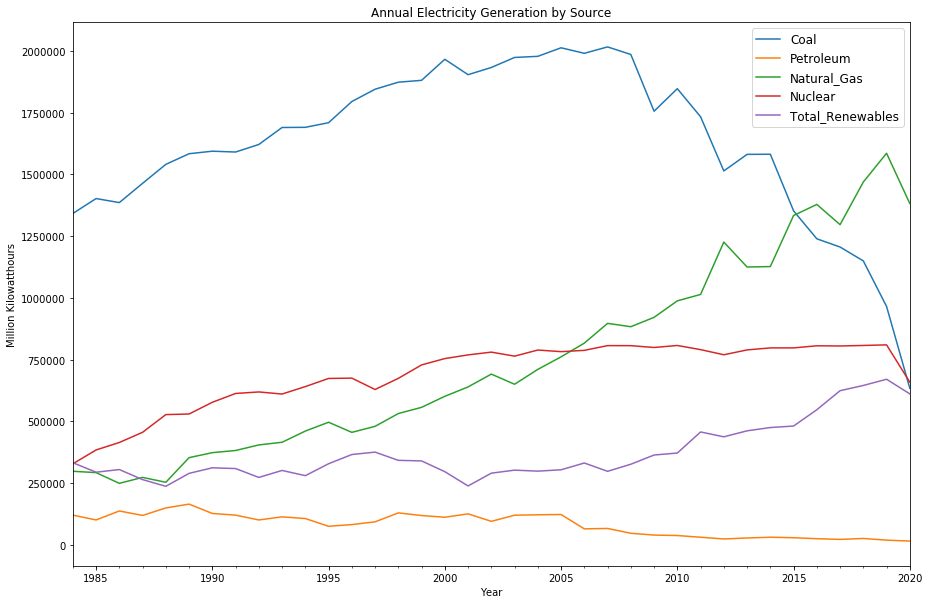

In [37]:
### Annual Electricity Generation by Source Plot
fig1 = df_annual.plot(
    title='Annual Electricity Generation by Source',
    figsize=(15,10)
)
fig1.set_ylabel('Million Kilowatthours')
fig1.set_xlabel('Year')
fig1.legend(fontsize=12);

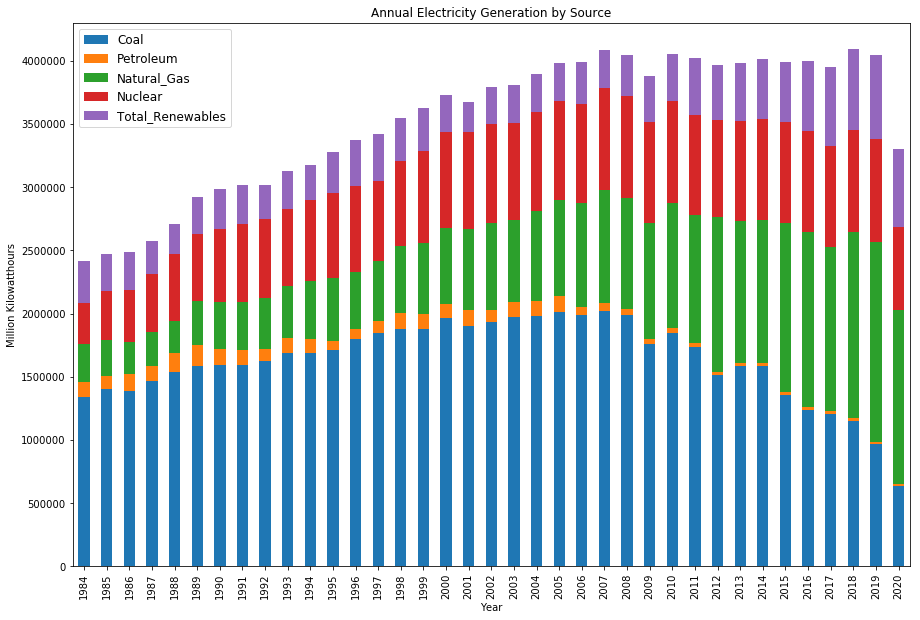

In [38]:
### Annual Electricity Generation by Source Plot #2
fig2 = df_annual2.plot.bar(
    figsize=(15,10),
    stacked=True,
    title='Annual Electricity Generation by Source'
)
fig2.set_xlabel('Year')
fig2.set_ylabel('Million Kilowatthours')
fig2.legend(fontsize=12);

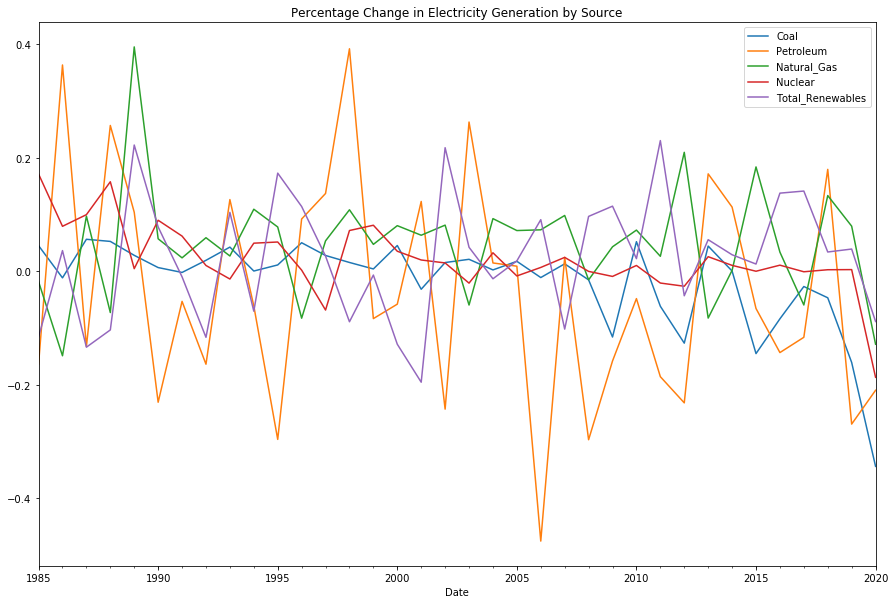

In [39]:

growth_df = df_annual.pct_change()
growth_df.dropna(inplace=True)
growth_df.plot(figsize=(15,10), title='Percentage Change in Electricity Generation by Source');

In [40]:
cumulative_growth = (1+growth_df).cumprod()
cumulative_growth.head()

Coal  Petroleum  Natural_Gas   Nuclear  Total_Renewables
Date                                                                    
1985-01-01  1.045053   0.836358     0.981682  1.171097          0.884325
1986-01-01  1.032907   1.140032     0.835621  1.263723          0.916485
1987-01-01  1.091006   0.989021     0.916700  1.389572          0.793961
1988-01-01  1.148301   1.242819     0.850054  1.608422          0.711944
1989-01-01  1.180444   1.371850     1.185731  1.615691          0.870113

In [41]:
cumulative_growth2 = (1+growth_df).cumprod()

In [42]:
cumulative_growth2.index = cumulative_growth2.index.strftime('%Y')

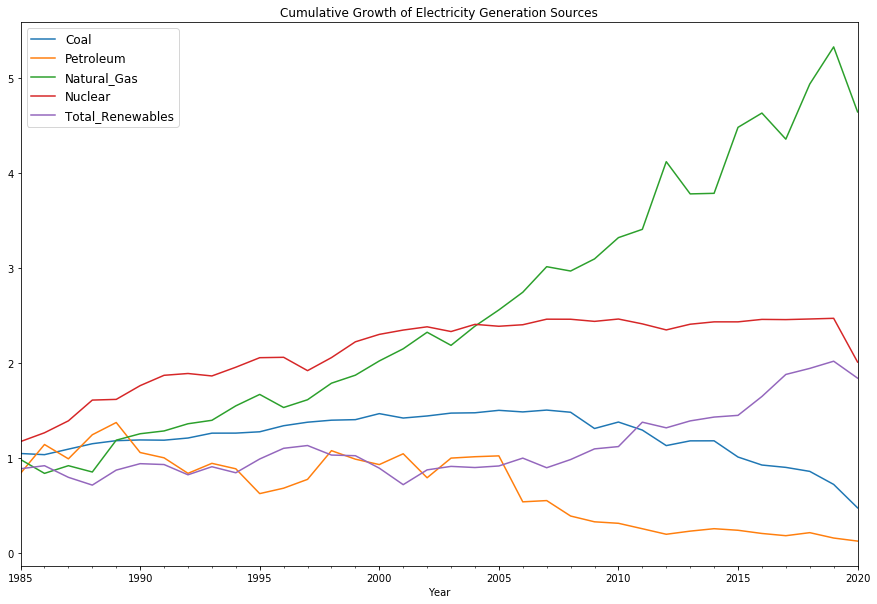

In [43]:
### Plot of cumulative growth of generation sources over time
fig3 = cumulative_growth.plot(
    figsize=(15,10),
    title='Cumulative Growth of Electricity Generation Sources'
)
fig3.set_xlabel('Year')
fig3.legend(fontsize=12);

## Percent of Total Generation by Source

In [44]:
# Find percent of total for each source
all_sources = (
    df_annual['Coal']+df_annual['Petroleum']+df_annual['Natural_Gas']+df_annual['Nuclear']+df_annual['Total_Renewables']
)

In [45]:
renew_pct = df_annual['Total_Renewables']/all_sources
renew_pct.head()

Date
1984-01-01    0.137297
1985-01-01    0.118810
1986-01-01    0.122256
1987-01-01    0.102434
1988-01-01    0.087374
Freq: AS-JAN, dtype: float64

In [46]:
coal_pct = df_annual['Coal']/all_sources
coal_pct.head()

Date
1984-01-01    0.554739
1985-01-01    0.567291
1986-01-01    0.556717
1987-01-01    0.568721
1988-01-01    0.569402
Freq: AS-JAN, dtype: float64

In [47]:
petrol_pct = df_annual['Petroleum']/all_sources
petrol_pct.head()

Date
1984-01-01    0.049536
1985-01-01    0.040541
1986-01-01    0.054869
1987-01-01    0.046038
1988-01-01    0.055031
Freq: AS-JAN, dtype: float64

In [48]:
natgas_pct = df_annual['Natural_Gas']/all_sources
natgas_pct.head()

Date
1984-01-01    0.122962
1985-01-01    0.118119
1986-01-01    0.099831
1987-01-01    0.105921
1988-01-01    0.093431
Freq: AS-JAN, dtype: float64

In [49]:
nuclear_pct = df_annual['Nuclear']/all_sources
nuclear_pct.head()

Date
1984-01-01    0.135465
1985-01-01    0.155239
1986-01-01    0.166327
1987-01-01    0.176886
1988-01-01    0.194761
Freq: AS-JAN, dtype: float64

In [50]:
pct_of_total = pd.concat(
    [coal_pct,petrol_pct,natgas_pct,nuclear_pct,renew_pct],
    axis='columns',
    join='inner'
)
pct_of_total.columns=['Coal', 'Petroleum','Natural_Gas','Nuclear','Total_Renewables']
pct_of_total.head()

Coal  Petroleum  Natural_Gas   Nuclear  Total_Renewables
Date                                                                    
1984-01-01  0.554739   0.049536     0.122962  0.135465          0.137297
1985-01-01  0.567291   0.040541     0.118119  0.155239          0.118810
1986-01-01  0.556717   0.054869     0.099831  0.166327          0.122256
1987-01-01  0.568721   0.046038     0.105921  0.176886          0.102434
1988-01-01  0.569402   0.055031     0.093431  0.194761          0.087374

In [51]:
pct_of_total2 = pd.concat(
    [coal_pct,petrol_pct,natgas_pct,nuclear_pct,renew_pct],
    axis='columns',
    join='inner'
)
pct_of_total2.columns=['Coal', 'Petroleum','Natural_Gas','Nuclear','Total_Renewables']

In [52]:
pct_of_total2.index = pct_of_total2.index.strftime('%Y')

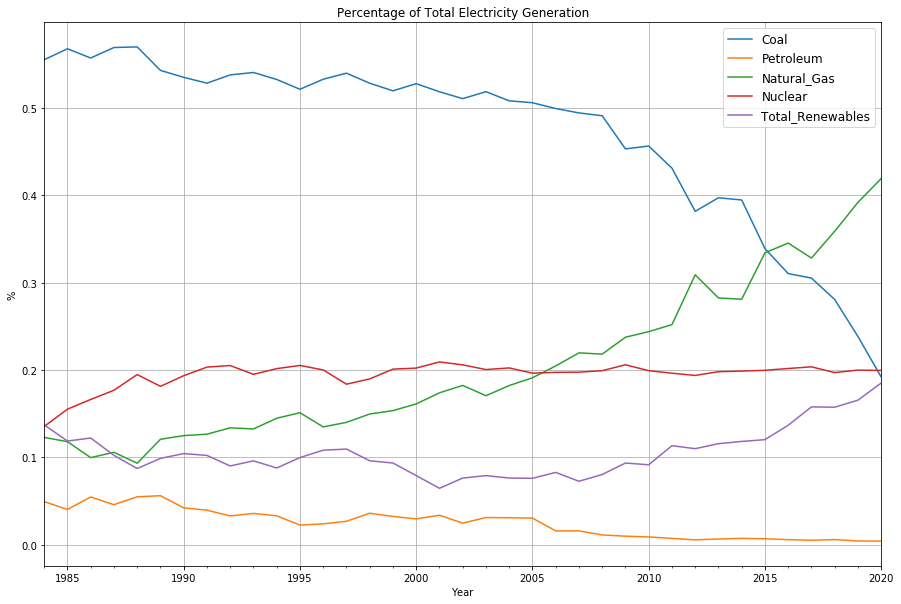

In [53]:
#### Percentage of Total Electricity Gen Graph
fig4 = pct_of_total.plot(
    figsize=(15,10),
    title='Percentage of Total Electricity Generation',
)
fig4.set_xlabel('Year')
fig4.set_ylabel('%')
fig4.legend(fontsize=12)
fig4.grid(axis='both');

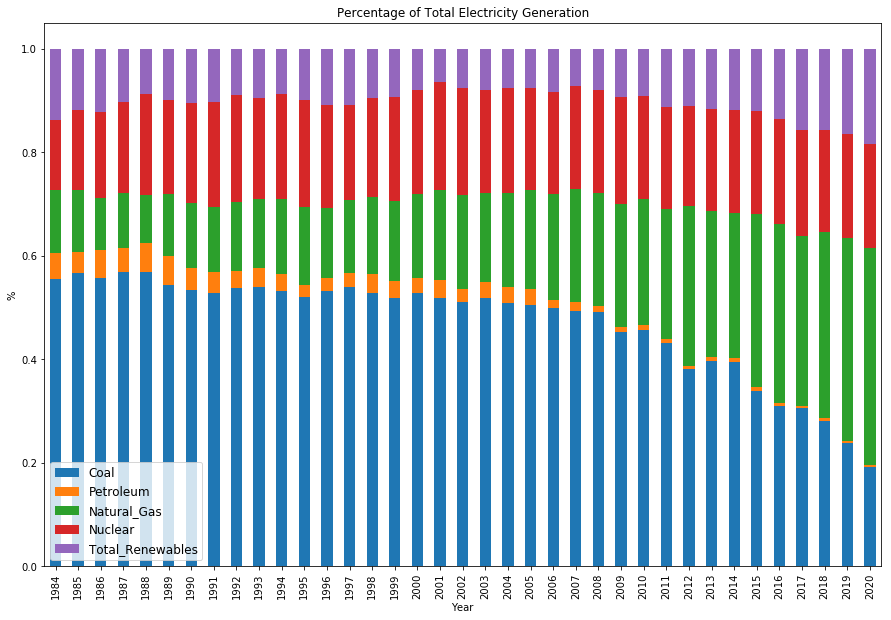

In [54]:
fig5 = pct_of_total2.plot.bar(
    figsize=(15,10),
    stacked=True,
    title='Percentage of Total Electricity Generation'
)
fig5.set_xlabel('Year')
fig5.set_ylabel('%')
fig5.legend(fontsize=12);

## Cost of Fuel to End User

In [55]:
cost_path = Path("../Data/cost_of_fuel_to_end_user.csv")
cost_data = pd.read_csv(cost_path)
cost_data.head()

MSN  YYYYMM Value  Column_Order                   Description  \
0  CPUCIUS  196013  29.6             1  Consumer Price Index (Urban)   
1  CPUCIUS  196113  29.9             1  Consumer Price Index (Urban)   
2  CPUCIUS  196213  30.2             1  Consumer Price Index (Urban)   
3  CPUCIUS  196313  30.6             1  Consumer Price Index (Urban)   
4  CPUCIUS  196413    31             1  Consumer Price Index (Urban)   

                    Unit  
0  Index 1982-1984 = 100  
1  Index 1982-1984 = 100  
2  Index 1982-1984 = 100  
3  Index 1982-1984 = 100  
4  Index 1982-1984 = 100

In [56]:
cost_data['YYYYMM'] = pd.to_datetime(cost_data['YYYYMM'], format='%Y%m', errors='coerce')
cost_data.dropna(inplace=True)

In [57]:
cost_data.drop(['Description','Column_Order'], axis=1, inplace=True)

In [58]:
cost_data.rename(columns= {'MSN':'Source','YYYYMM':'Date'}, inplace=True)
cost_data = cost_data.set_index('Date')

In [59]:
cost_data.head()

Source  Value                   Unit
Date                                             
1995-01-01  CPUCIUS  150.3  Index 1982-1984 = 100
1995-02-01  CPUCIUS  150.9  Index 1982-1984 = 100
1995-03-01  CPUCIUS  151.4  Index 1982-1984 = 100
1995-04-01  CPUCIUS  151.9  Index 1982-1984 = 100
1995-05-01  CPUCIUS  152.2  Index 1982-1984 = 100

In [60]:
elec_cost = cost_data[cost_data.Source == 'ESRCOUS']
elec_cost.rename(columns= {'Value':'Electricity_Cost'}, inplace=True)
elec_cost.drop(['Source','Unit'], axis=1, inplace=True)

In [61]:
elec_cost = elec_cost[elec_cost.Electricity_Cost != 'Not Available']

In [62]:
elec_cost["Electricity_Cost"] = elec_cost["Electricity_Cost"].astype("float")
elec_cost.head()

Electricity_Cost
Date                        
1995-01-01             5.223
1995-02-01             5.308
1995-03-01             5.376
1995-04-01             5.537
1995-05-01             5.604

In [63]:
elec_cost_annual = elec_cost.resample('AS').mean()
elec_cost_annual.head()

Electricity_Cost
Date                        
1995-01-01          5.508583
1996-01-01          5.331917
1997-01-01          5.253083
1998-01-01          5.055250
1999-01-01          4.895417

## Retail Price of Electricity

In [64]:
retail_path = Path("../Data/electricity_retail_prices.csv")
retail_data = pd.read_csv(retail_path)
retail_data.head()

MSN  YYYYMM Value  Column_Order  \
0  ESRCUUS  196013   2.6             1   
1  ESRCUUS  196113   2.6             1   
2  ESRCUUS  196213   2.6             1   
3  ESRCUUS  196313   2.5             1   
4  ESRCUUS  196413   2.5             1   

                                        Description  \
0  Average Retail Price of Electricity, Residential   
1  Average Retail Price of Electricity, Residential   
2  Average Retail Price of Electricity, Residential   
3  Average Retail Price of Electricity, Residential   
4  Average Retail Price of Electricity, Residential   

                                       Unit  
0  Cents per Kilowatthour,  Including Taxes  
1  Cents per Kilowatthour,  Including Taxes  
2  Cents per Kilowatthour,  Including Taxes  
3  Cents per Kilowatthour,  Including Taxes  
4  Cents per Kilowatthour,  Including Taxes

In [65]:
retail_data['YYYYMM'] = pd.to_datetime(retail_data['YYYYMM'], format='%Y%m', errors='coerce')
retail_data.dropna(inplace=True)

In [66]:
retail_data.drop(['Description','Column_Order','Unit'], axis=1, inplace=True)

In [67]:
retail_data.rename(columns= {'MSN':'Source','YYYYMM':'Date'}, inplace=True)
retail_data = retail_data.set_index('Date')

In [68]:
retail_data = retail_data[retail_data.Source != 'Not Available']

In [69]:
residential = retail_data[retail_data.Source == 'ESRCUUS']
residential.drop(['Source'], axis=1, inplace=True)

In [70]:
residential = residential[residential.Value != 'Not Available']

In [71]:
residential.rename(columns= {'Value':'Residential_Retail_Cost'}, inplace=True)

In [72]:
residential["Residential_Retail_Cost"] = residential["Residential_Retail_Cost"].astype("float")

In [73]:
retail_annual = residential.resample('AS').mean()
retail_annual.head()

Residential_Retail_Cost
Date                               
1976-01-01                 3.783333
1977-01-01                 4.100000
1978-01-01                 4.316667
1979-01-01                 4.658333
1980-01-01                 5.358333

In [74]:
elec_cost_df = pd.concat(
    [elec_cost_annual,retail_annual],
    axis='columns',
    join='inner'
)
elec_cost_df.head()

Electricity_Cost  Residential_Retail_Cost
Date                                                 
1995-01-01          5.508583                 8.395000
1996-01-01          5.331917                 8.364167
1997-01-01          5.253083                 8.432500
1998-01-01          5.055250                 8.240833
1999-01-01          4.895417                 8.155000

In [75]:
elec_cost_df.tail()

Electricity_Cost  Residential_Retail_Cost
Date                                                 
2016-01-01          5.225750                12.542500
2017-01-01          5.255083                12.881667
2018-01-01          5.124667                12.869167
2019-01-01          5.089500                13.012500
2020-01-01          5.112500                13.216000

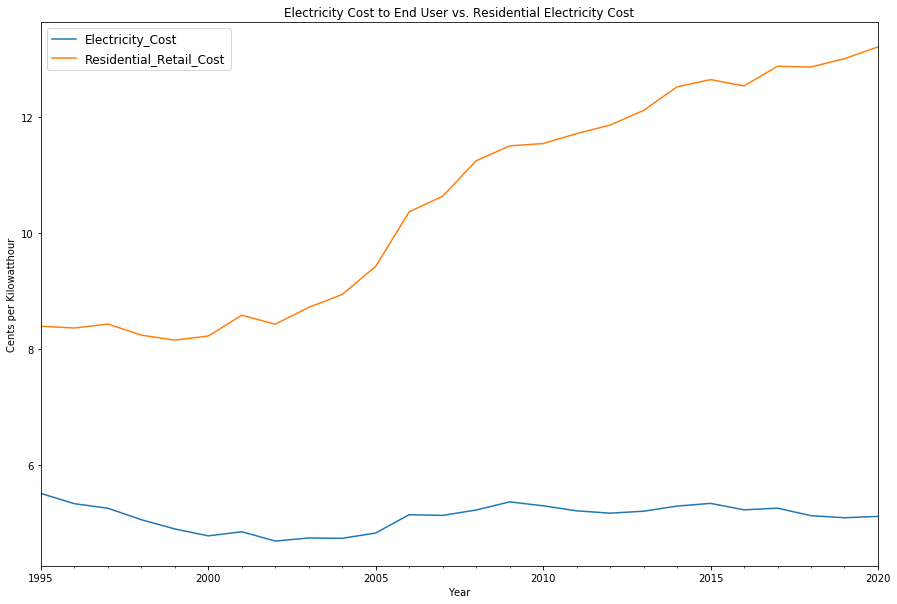

In [76]:
### Electricity cost to end user vs. residential electricity cost graph
fig6 = elec_cost_df.plot(
    figsize=(15,10),
    title='Electricity Cost to End User vs. Residential Electricity Cost'
)
fig6.set_ylabel('Cents per Kilowatthour')
fig6.set_xlabel('Year')
fig6.legend(fontsize=12);

In [77]:
elec_cost_annual_pct = elec_cost_annual.pct_change()
elec_cost_annual_pct.dropna(inplace=True)

In [78]:
retail_annual_pct = retail_annual.pct_change()
retail_annual_pct.dropna(inplace=True)

In [79]:
annual_elec_cost_pct_df = pd.concat(
    [elec_cost_annual_pct,retail_annual_pct],
    axis='columns',
    join='inner'
)
annual_elec_cost_pct_df.head()

Electricity_Cost  Residential_Retail_Cost
Date                                                 
1996-01-01         -0.032071                -0.003673
1997-01-01         -0.014785                 0.008170
1998-01-01         -0.037660                -0.022730
1999-01-01         -0.031617                -0.010416
2000-01-01         -0.024257                 0.008788

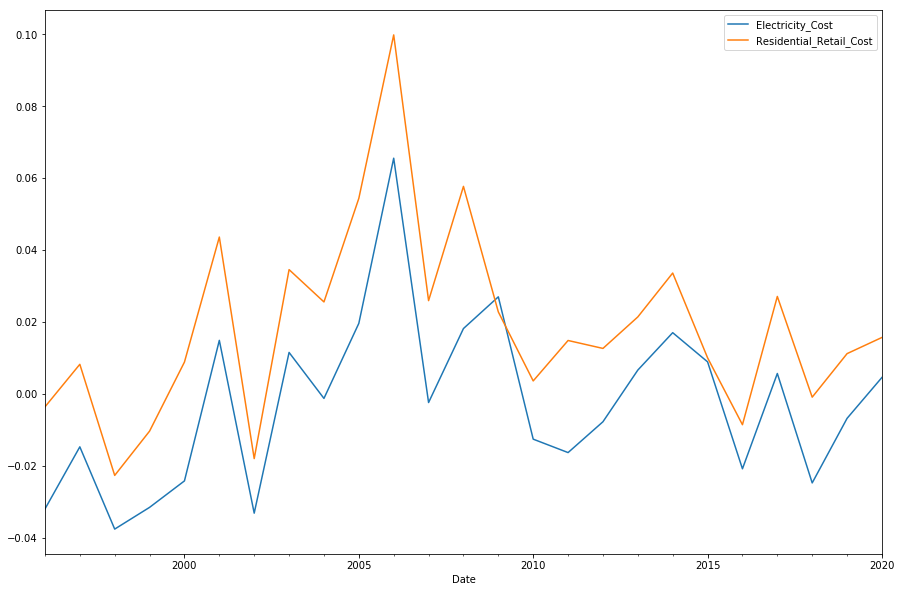

In [80]:
### Not using this chart in presentation b/c doesn't tell much
annual_elec_cost_pct_df.plot(figsize=(15,10));

## Correlation

In [81]:
df_all = pd.concat([coal, petroleum, natgas, nuclear, total_renewables, elec_cost, residential], axis='columns', join='inner')
df_all.head()

Coal  Petroleum  Natural_Gas    Nuclear  Total_Renewables  \
Date                                                                          
1995-01-01  147220.464   5096.439    32759.903  63341.706         26030.561   
1995-02-01  132900.242   8628.777    28126.101  51858.111         25911.390   
1995-03-01  131429.813   3774.450    38977.298  51879.920         29510.386   
1995-04-01  123075.938   4062.137    36240.672  49320.883         25426.677   
1995-05-01  130418.121   5379.366    39909.814  54386.954         28976.528   

            Electricity_Cost  Residential_Retail_Cost  
Date                                                   
1995-01-01             5.223                     7.85  
1995-02-01             5.308                     8.01  
1995-03-01             5.376                     8.14  
1995-04-01             5.537                     8.41  
1995-05-01             5.604                     8.53

In [82]:
df_corr = df_all.corr()
df_corr

Coal  Petroleum  Natural_Gas   Nuclear  \
Coal                     1.000000   0.679322    -0.525257  0.087670   
Petroleum                0.679322   1.000000    -0.574657 -0.150582   
Natural_Gas             -0.525257  -0.574657     1.000000  0.583081   
Nuclear                  0.087670  -0.150582     0.583081  1.000000   
Total_Renewables        -0.823809  -0.610489     0.675384  0.197925   
Electricity_Cost        -0.218789  -0.453680     0.376051 -0.038947   
Residential_Retail_Cost -0.653091  -0.799209     0.871424  0.452486   

                         Total_Renewables  Electricity_Cost  \
Coal                            -0.823809         -0.218789   
Petroleum                       -0.610489         -0.453680   
Natural_Gas                      0.675384          0.376051   
Nuclear                          0.197925         -0.038947   
Total_Renewables                 1.000000          0.268760   
Electricity_Cost                 0.268760          1.000000   
Residential_Retail_Cost          0.730661          0.488586   

                         Residential_Retail_Cost  
Coal                                   -0.653091  
Petroleum                              -0.799209  
Natural_Gas                             0.871424  
Nuclear                                 0.452486  
Total_Renewables                        0.730661  
Electricity_Cost                        0.488586  
Residential_Retail_Cost                 1.000000

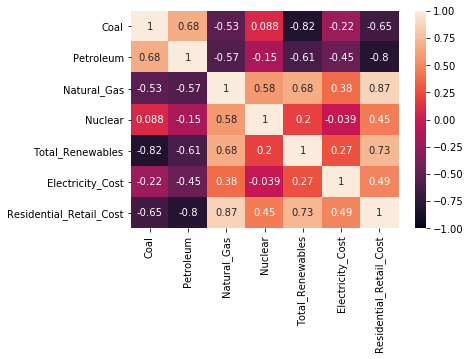

In [83]:
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True);

In [84]:
# plt.figure(figsize=(20,40), facecolor='white')
# plotnumber = 1

# for column in df_all:
#     if plotnumber<=7 :
#         ax = plt.subplot(7,3,plotnumber)
#         plt.scatter(df_all[column],y_elec)
#         plt.xlabel(column,fontsize=20)
#         plt.ylabel('Electricity',fontsize=20)
#     plotnumber+=1
# plt.tight_layout()

## Linear Regression Analysis

In [85]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 1995-01-01 to 2020-10-01
Freq: MS
Data columns (total 7 columns):
Coal                       310 non-null float64
Petroleum                  310 non-null float64
Natural_Gas                310 non-null float64
Nuclear                    310 non-null float64
Total_Renewables           310 non-null float64
Electricity_Cost           310 non-null float64
Residential_Retail_Cost    310 non-null float64
dtypes: float64(7)
memory usage: 19.4 KB


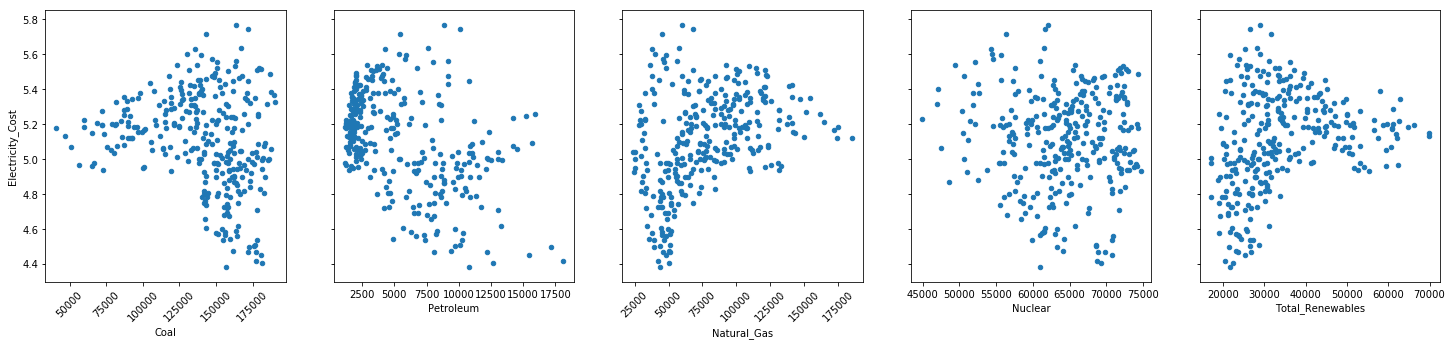

In [86]:
fig7, axs = plt.subplots(1, 5, sharey=True)
df_all.plot(kind='scatter', x='Coal', y='Electricity_Cost', ax=axs[0], figsize=(25,5),rot=45)
df_all.plot(kind='scatter', x='Petroleum', y='Electricity_Cost', ax=axs[1])
df_all.plot(kind='scatter', x='Natural_Gas', y='Electricity_Cost', ax=axs[2],rot=45)
df_all.plot(kind='scatter', x='Nuclear', y='Electricity_Cost', ax=axs[3])
df_all.plot(kind='scatter', x='Total_Renewables', y='Electricity_Cost', ax=axs[4])

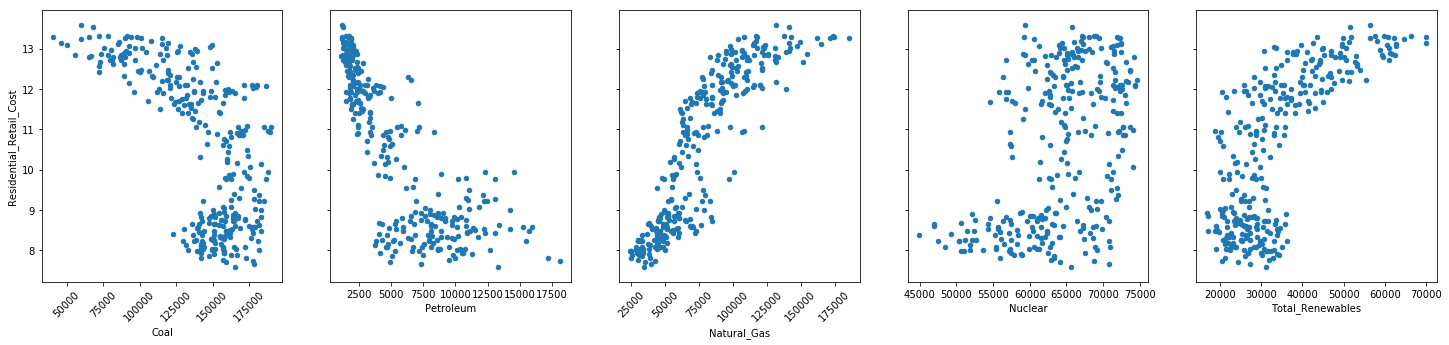

In [87]:
fig8, axs = plt.subplots(1, 5, sharey=True)
df_all.plot(kind='scatter', x='Coal', y='Residential_Retail_Cost', ax=axs[0], figsize=(25,5),rot=45)
df_all.plot(kind='scatter', x='Petroleum', y='Residential_Retail_Cost', ax=axs[1])
df_all.plot(kind='scatter', x='Natural_Gas', y='Residential_Retail_Cost', ax=axs[2],rot=45)
df_all.plot(kind='scatter', x='Nuclear', y='Residential_Retail_Cost', ax=axs[3])
df_all.plot(kind='scatter', x='Total_Renewables', y='Residential_Retail_Cost', ax=axs[4])

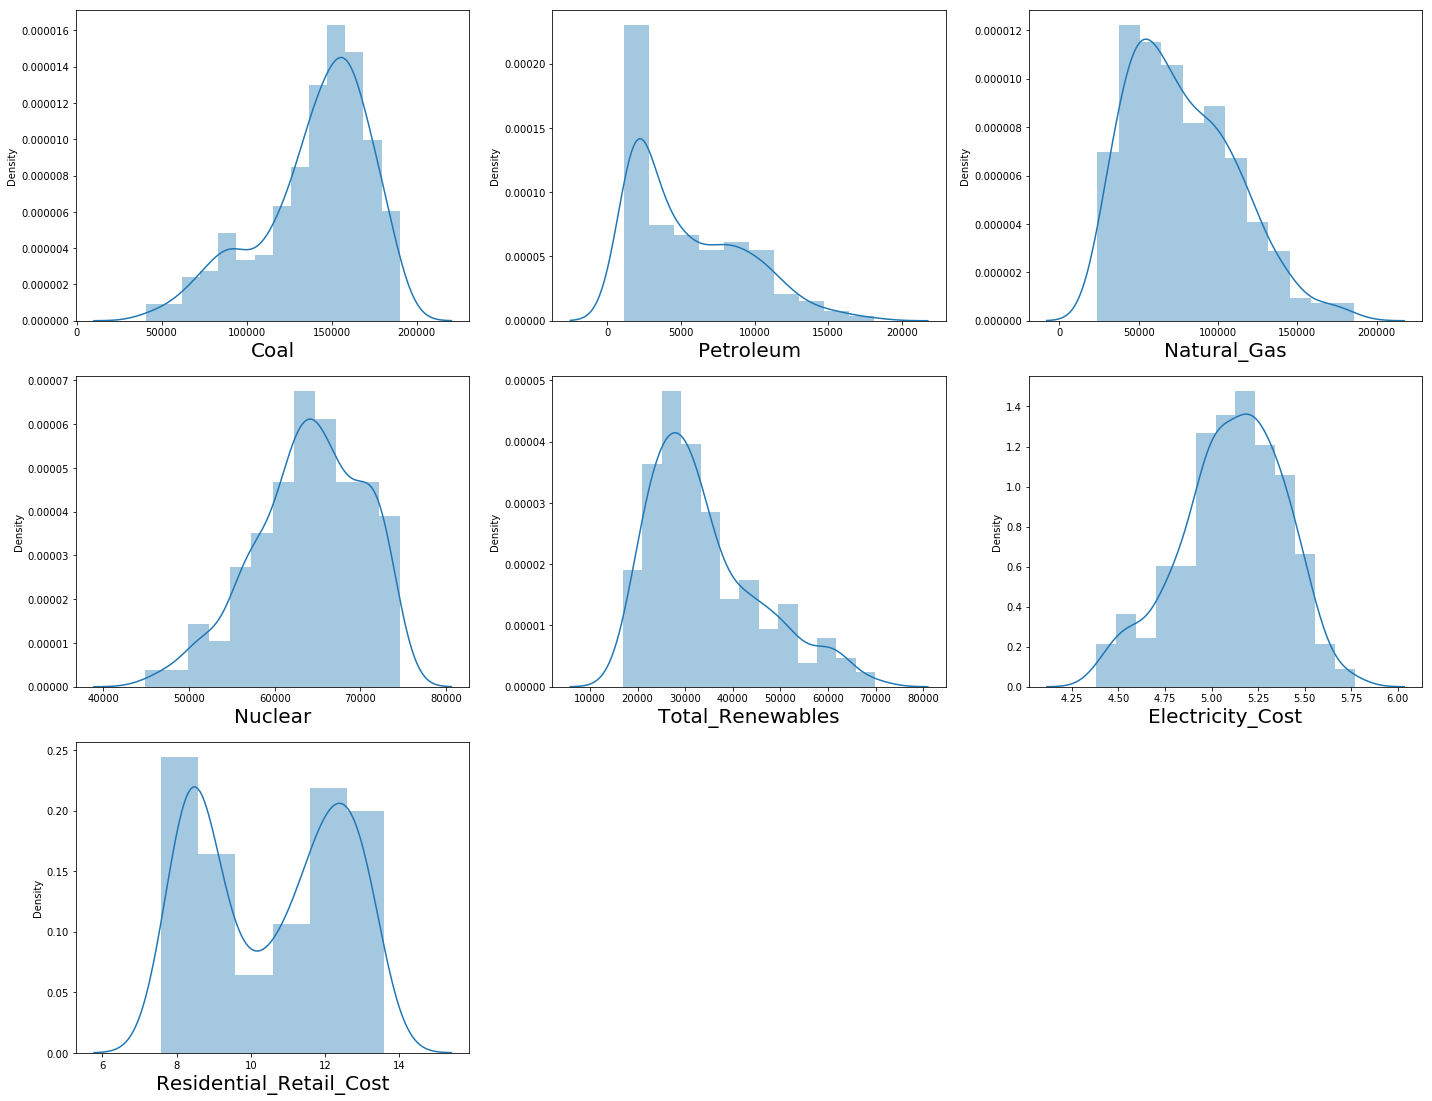

In [88]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_all:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_all[column])
        plt.xlabel(column,fontsize=20)
        # plt.ylabel('Electricity',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [89]:
y_elec = df_all['Electricity_Cost']
y_retail = df_all['Residential_Retail_Cost']
xcoal = df_all['Coal']
xpetro = df_all['Petroleum']
xnatgas = df_all['Natural_Gas']
xnuclear = df_all['Nuclear']
xrenew = df_all['Total_Renewables']


nr_cols = ['Coal', 'Petroleum','Natural_Gas','Nuclear']
x_nonrenew = df_all[nr_cols]

In [90]:
log_petrol = np.log1p(df_all['Petroleum'])
sqr_coal = df_all.Coal**2
log_renew = np.log1p(df_all['Total_Renewables'])

In [91]:
transformed_df = pd.concat(
    [sqr_coal,log_petrol,natgas,nuclear,log_renew],
    axis='columns',
    join='inner'
)
transformed_df.head()

Coal  Petroleum  Natural_Gas    Nuclear  Total_Renewables
Date                                                                         
1995-01-01  2.167387e+10   8.536494    32759.903  63341.706         10.167065
1995-02-01  1.766247e+10   9.062974    28126.101  51858.111         10.162477
1995-03-01  1.727380e+10   8.236275    38977.298  51879.920         10.292531
1995-04-01  1.514769e+10   8.309711    36240.672  49320.883         10.143594
1995-05-01  1.700889e+10   8.590512    39909.814  54386.954         10.274276

In [92]:
transformed_df = transformed_df.rename(columns={'Coal':'Coal_sqrd','Petroleum':'log_Petroleum','Total_Renewables':'log_Renewables','Natural Gas':'Natural_Gas','Nuclear Electric':'Nuclear_Electric'})
transformed_df.head()

Coal_sqrd  log_Petroleum  Natural_Gas    Nuclear  \
Date                                                              
1995-01-01  2.167387e+10       8.536494    32759.903  63341.706   
1995-02-01  1.766247e+10       9.062974    28126.101  51858.111   
1995-03-01  1.727380e+10       8.236275    38977.298  51879.920   
1995-04-01  1.514769e+10       8.309711    36240.672  49320.883   
1995-05-01  1.700889e+10       8.590512    39909.814  54386.954   

            log_Renewables  
Date                        
1995-01-01       10.167065  
1995-02-01       10.162477  
1995-03-01       10.292531  
1995-04-01       10.143594  
1995-05-01       10.274276

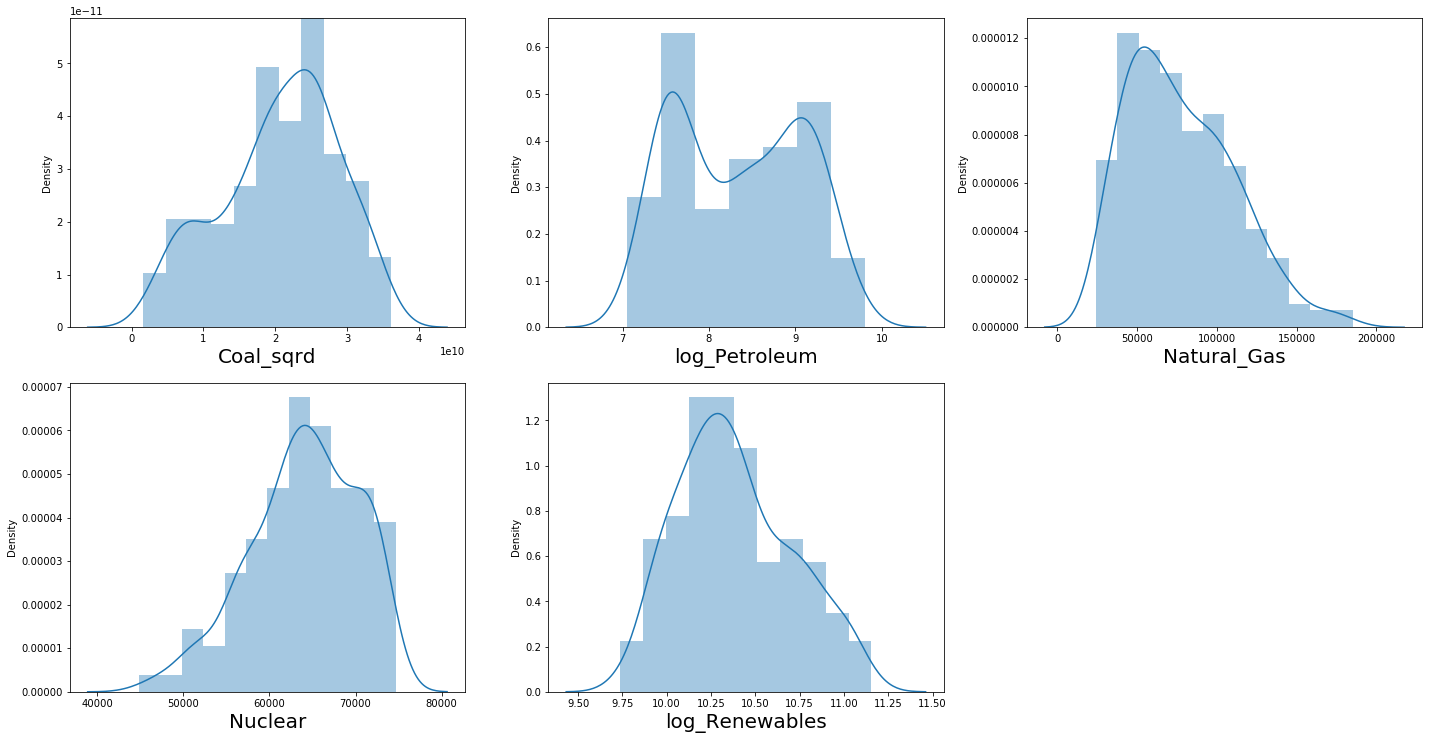

In [93]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in transformed_df:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(transformed_df[column])
        plt.xlabel(column,fontsize=20)
        # plt.ylabel('Electricity',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [94]:
tx = sm.add_constant(transformed_df)

In [95]:
#Regression on Electricity cost and all transformed sources
reg1 = sm.OLS(y_elec,tx)
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:       Electricity_Cost   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     38.06
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           2.83e-30
Time:                        15:51:11   Log-Likelihood:                 33.863
No. Observations:                 310   AIC:                            -55.73
Df Residuals:                     304   BIC:                            -33.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3878      0.805      7.

In [96]:
#Regression on Retail cost and all transformed sources
reg2 = sm.OLS(y_retail,tx)
results2 = reg2.fit()
print(results2.summary())

                               OLS Regression Results                              
Dep. Variable:     Residential_Retail_Cost   R-squared:                       0.914
Model:                                 OLS   Adj. R-squared:                  0.913
Method:                      Least Squares   F-statistic:                     648.7
Date:                     Wed, 24 Feb 2021   Prob (F-statistic):          8.07e-160
Time:                             15:51:11   Log-Likelihood:                -257.23
No. Observations:                      310   AIC:                             526.5
Df Residuals:                          304   BIC:                             548.9
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

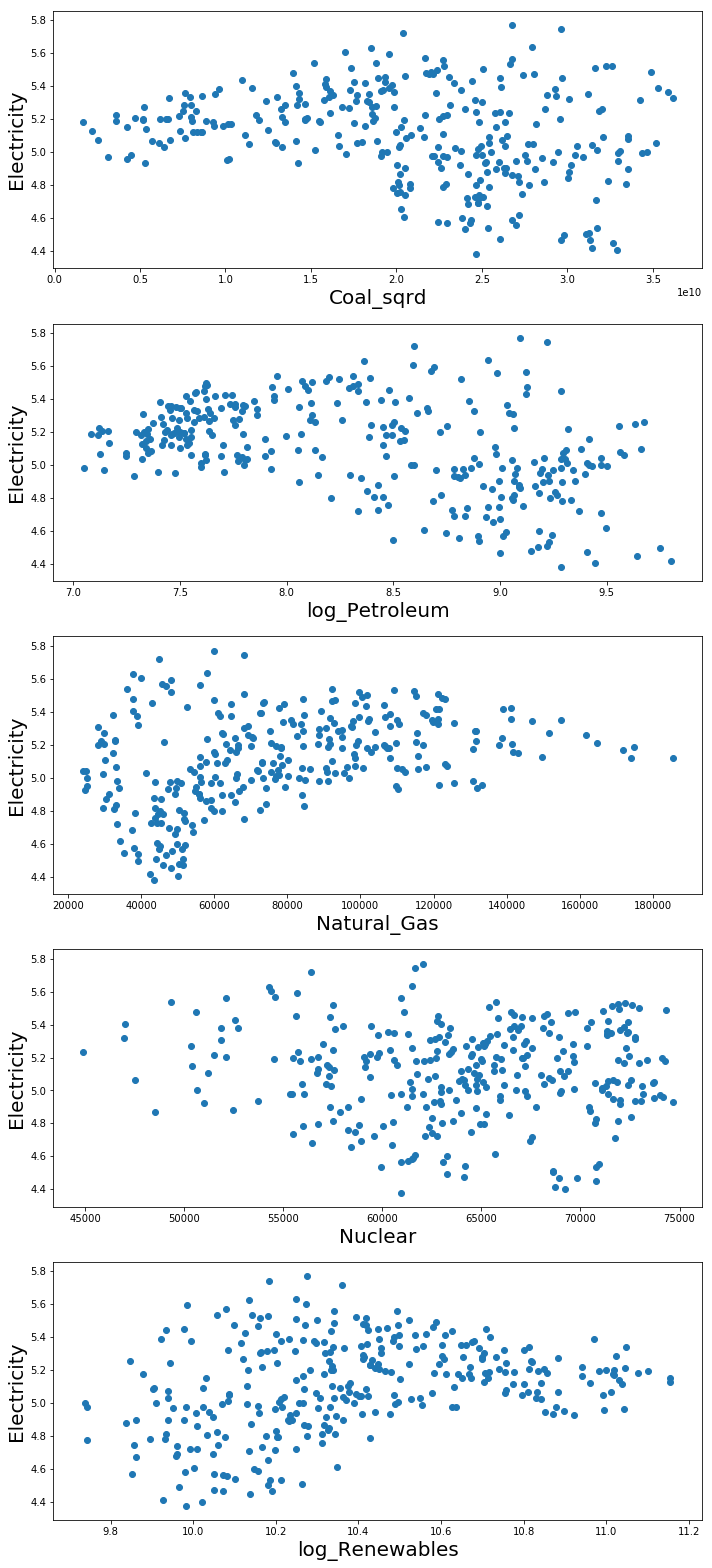

In [97]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1

for column in transformed_df:
    if plotnumber<=7 :
        ax = plt.subplot(7,1,plotnumber)
        plt.scatter(transformed_df[column],y_elec)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Electricity',fontsize=20)
    plotnumber+=1
plt.tight_layout()

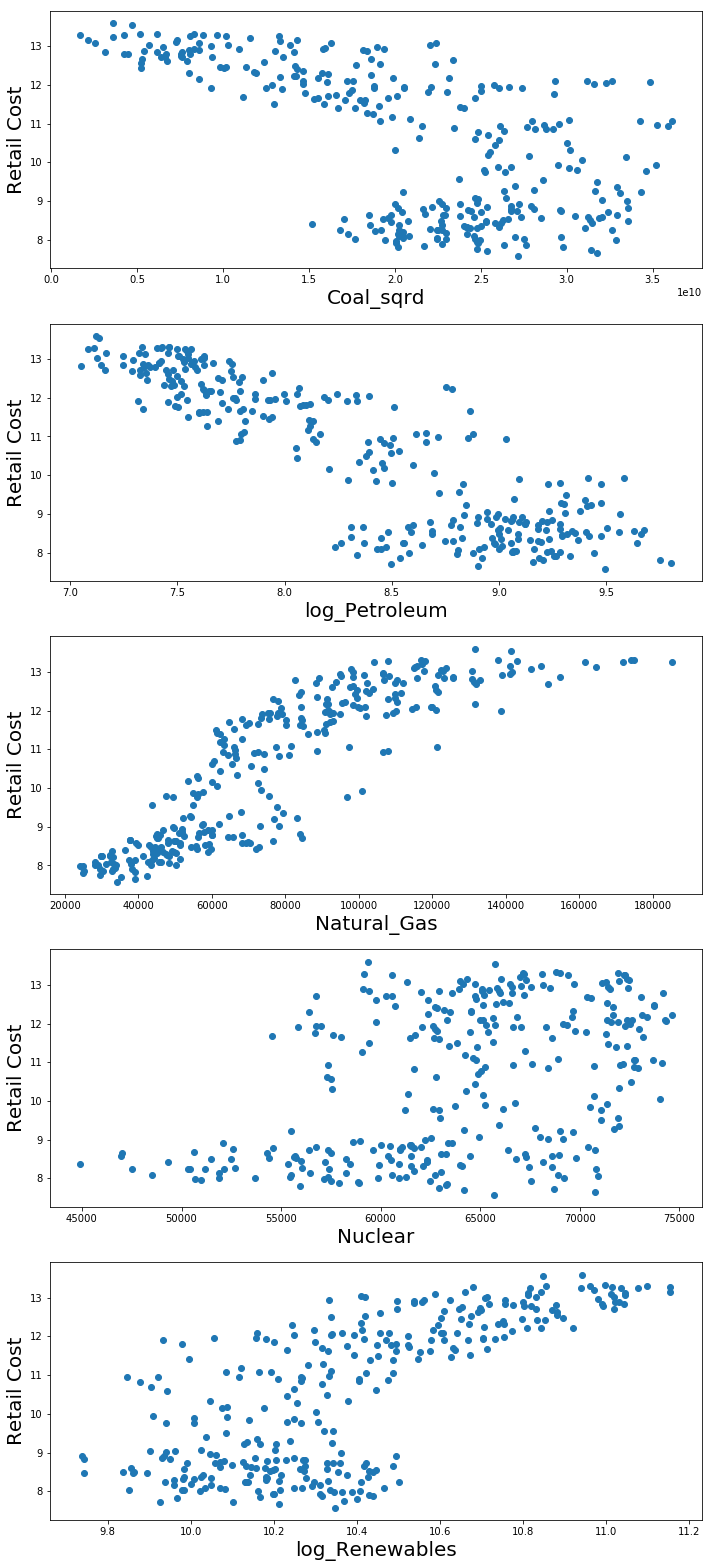

In [98]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1

for column in transformed_df:
    if plotnumber<=7 :
        ax = plt.subplot(7,1,plotnumber)
        plt.scatter(transformed_df[column],y_retail)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Retail Cost',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [99]:
renew_trans = transformed_df['log_Renewables']
colz=['Coal_sqrd','log_Petroleum','Natural_Gas','Nuclear']
nonrenew_trans = transformed_df[colz]

In [100]:
x_r_t = sm.add_constant(renew_trans)
x_nr_t = sm.add_constant(nonrenew_trans)

In [101]:
reg3 = sm.OLS(y_elec,x_nr_t)
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:       Electricity_Cost   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     45.64
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           4.95e-30
Time:                        15:51:16   Log-Likelihood:                 31.233
No. Observations:                 310   AIC:                            -52.47
Df Residuals:                     305   BIC:                            -33.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0691      0.326     24.714

In [102]:
reg4 = sm.OLS(y_elec,x_r_t)
results4 = reg4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:       Electricity_Cost   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     34.01
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.38e-08
Time:                        15:51:17   Log-Likelihood:                -25.243
No. Observations:                 310   AIC:                             54.49
Df Residuals:                     308   BIC:                             61.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2774      0.486      4.

In [103]:
reg5 = sm.OLS(y_retail,x_nr_t)
results5 = reg5.fit()
print(results5.summary())

                               OLS Regression Results                              
Dep. Variable:     Residential_Retail_Cost   R-squared:                       0.913
Model:                                 OLS   Adj. R-squared:                  0.912
Method:                      Least Squares   F-statistic:                     800.9
Date:                     Wed, 24 Feb 2021   Prob (F-statistic):          2.32e-160
Time:                             15:51:17   Log-Likelihood:                -259.44
No. Observations:                      310   AIC:                             528.9
Df Residuals:                          305   BIC:                             547.6
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [104]:
reg6 = sm.OLS(y_retail,x_r_t)
results6 = reg6.fit()
print(results6.summary())

                               OLS Regression Results                              
Dep. Variable:     Residential_Retail_Cost   R-squared:                       0.535
Model:                                 OLS   Adj. R-squared:                  0.534
Method:                      Least Squares   F-statistic:                     355.0
Date:                     Wed, 24 Feb 2021   Prob (F-statistic):           3.30e-53
Time:                             15:51:17   Log-Likelihood:                -519.23
No. Observations:                      310   AIC:                             1042.
Df Residuals:                          308   BIC:                             1050.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(transformed_df)

In [106]:
variables = X_scaled

# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

In [107]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = transformed_df.columns

In [108]:
vif

VIF        Features
0  5.126372       Coal_sqrd
1  4.155759   log_Petroleum
2  3.590798     Natural_Gas
3  2.425914         Nuclear
4  3.285858  log_Renewables